# 프로젝트명: 데이터 수집 실습 1 (BeautifulSoup4)

#### 📌 BeautifulSoup는 정적인 사이트 수집에 주로 사용되며, html 태그의 데이터들을 가져옵니다.
- BeautifulSoup - 정적, Selenium - 동적
- BeautifulSoup의 단점은 웹 페이지에 스크롤로 움직여야지 데이터가 나오는 구조에선 사용하기 어렵습니다.

#### 🚨 주의사항
- 데이터 수집을 싫어하는 사이트의 정책 존중하기
- 많은 요청은 서버에서 차단할 수 있으니, time.sleep(5) 실행해서 서버 과부하 예방하기


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

### 1. requests로 데이터 가져오기

In [2]:
url = "https://weworkremotely.com/remote-full-time-jobs"
response = requests.get(url)

In [4]:
response

<Response [200]>

완전하게 데이터가 왔다는 코드가 200

In [3]:
## 해당 URL을 요청했을때 정상적으로 응답이 왔는지 확인
if response.status_code == 200: # ctrl + status_code 클릭해보기
    print("성공")
else :
    print("실패")

성공


### 2. BS4 사용하기

https://beautiful-soup-4.readthedocs.io/en/latest/

In [5]:
soup = BeautifulSoup(response.content, 'html.parser')

In [6]:
response.content # 수집하고자 하는 insight의 

b'<!DOCTYPE html><html><head><meta charset=utf-8 /><script>window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"f7ae79e7ca","applicationID":"192262830","transactionName":"d1gPFhEMXVVWQxwKC0dDCAwEEB5fRl1fORZdWgQ9DwpCTVpfVBU=","queueTime":1,"applicationTime":260,"agent":""}</script><script>(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"f7ae79e7ca",applicationID:"192262830"};;/*! For license information please see nr-loader-rum-1.260.0.min.js.LICENSE.txt */\n(()=>{var e,t,r={234:(e,t,r)=>{"use strict";r.d(t,{P_:()=>v,Mt:()=>b,C5:()=>s,OP:()=>k,lF:()=>P,Yu:()=>_,Dg:()=>m,CX:()=>c,GE:()=>w,sU:()=>N});var n=r(8632),i=r(9567);const o={beacon:n.ce.beacon,errorBeacon:n.ce.errorBeacon,licenseKey:void 0,applicationID:void 0,sa:void 0,queueTime:void 0,applicationTime:void 0,ttGuid:void 0,user:void 0,account:void 0,product:void 0,extra:void 0,jsAttributes:{},userAtt

https://weworkremotely.com/ 들어가서 f12번 누르면 개발자모드

In [8]:
soup # 분석이 쉽게 도와줌

<!DOCTYPE html>
<html><head><meta charset="utf-8"/><script>window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"f7ae79e7ca","applicationID":"192262830","transactionName":"d1gPFhEMXVVWQxwKC0dDCAwEEB5fRl1fORZdWgQ9DwpCTVpfVBU=","queueTime":1,"applicationTime":260,"agent":""}</script><script>(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"f7ae79e7ca",applicationID:"192262830"};;/*! For license information please see nr-loader-rum-1.260.0.min.js.LICENSE.txt */
(()=>{var e,t,r={234:(e,t,r)=>{"use strict";r.d(t,{P_:()=>v,Mt:()=>b,C5:()=>s,OP:()=>k,lF:()=>P,Yu:()=>_,Dg:()=>m,CX:()=>c,GE:()=>w,sU:()=>N});var n=r(8632),i=r(9567);const o={beacon:n.ce.beacon,errorBeacon:n.ce.errorBeacon,licenseKey:void 0,applicationID:void 0,sa:void 0,queueTime:void 0,applicationTime:void 0,ttGuid:void 0,user:void 0,account:void 0,product:void 0,extra:void 0,jsAttributes:{},userAttr

### 2-1. BS 주요 메소드 
- find : 정의한 요소 1개만 찾아줍니다. 내가 정의한 태그의 클래스명, id 한개만 찾음.
- find_all : 정의한 요소들을 다 찾아줍니다.

![태그의클래스](https://file.notion.so/f/f/4e4750b9-2973-47f2-9fe5-8330ce1f2c19/6fc7e475-b001-44df-a496-121d3d506968/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA_2024-05-21_%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB_6.42.27.png?id=6b7322b7-4d70-4722-b7ee-ecbd0a3ec2ac&table=block&spaceId=4e4750b9-2973-47f2-9fe5-8330ce1f2c19&expirationTimestamp=1716328800000&signature=4NAiaIoGcyPep2pY3unz-Rqv1yKlP0iJJAqzFeMnwrs&downloadName=%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA+2024-05-21+%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB+6.42.27.png)

In [10]:
item_table = soup.find('section', class_='jobs')

In [11]:
item_table

<section class="jobs"><article><h2> All Remote Full-Time Jobs <span class="latest_post">Latest post about 7 hours ago</span></h2><ul><li class="feature"><span class="new">New</span><div class="highlight-bar"></div><div class="tooltip--flag-logo"><a href="/company/lemon-io"><div alt="Lemon.io is hiring a remote Senior Java Full-stack Developer at We Work Remotely." class="flag-logo" loading="lazy" style="background-image:url(https://we-work-remotely.imgix.net/logos/0076/3337/logo.gif?ixlib=rails-4.0.0&amp;w=50&amp;h=50&amp;dpr=2&amp;fit=fill&amp;auto=compress)"></div><span class="tooltiptext">View Company Profile</span></a></div><div class="clickable-element d-none d-md-block" data-bs-target="#HomeApplyModal" data-bs-toggle="modal" onclick="trackModalClick()" style="cursor: pointer;"><span class="company">Lemon.io</span><object><a href="/top-remote-companies" style="display: inline-block;"><span class="listing-pill" style="background: #dde0f4;">Top 100</span></a></object><br/><span clas

In [12]:
# 요소 여러개 가져오기
item_table.find_all('li', class_ = 'feature')

[<li class="feature"><span class="new">New</span><div class="highlight-bar"></div><div class="tooltip--flag-logo"><a href="/company/lemon-io"><div alt="Lemon.io is hiring a remote Senior Java Full-stack Developer at We Work Remotely." class="flag-logo" loading="lazy" style="background-image:url(https://we-work-remotely.imgix.net/logos/0076/3337/logo.gif?ixlib=rails-4.0.0&amp;w=50&amp;h=50&amp;dpr=2&amp;fit=fill&amp;auto=compress)"></div><span class="tooltiptext">View Company Profile</span></a></div><div class="clickable-element d-none d-md-block" data-bs-target="#HomeApplyModal" data-bs-toggle="modal" onclick="trackModalClick()" style="cursor: pointer;"><span class="company">Lemon.io</span><object><a href="/top-remote-companies" style="display: inline-block;"><span class="listing-pill" style="background: #dde0f4;">Top 100</span></a></object><br/><span class="title">Senior Java Full-stack Developer</span><span class="featured">featured</span><br/><span class="company">Full-Time</span><s

In [15]:
# 위의 결과를 한번에 출력
### BS4의 chaining을 이용하여 데이터 추출
# section, jobs, li까지 가져오기
jobs = soup.find('section', class_='jobs').find_all('li')
jobs

[<li class="feature"><span class="new">New</span><div class="highlight-bar"></div><div class="tooltip--flag-logo"><a href="/company/lemon-io"><div alt="Lemon.io is hiring a remote Senior Java Full-stack Developer at We Work Remotely." class="flag-logo" loading="lazy" style="background-image:url(https://we-work-remotely.imgix.net/logos/0076/3337/logo.gif?ixlib=rails-4.0.0&amp;w=50&amp;h=50&amp;dpr=2&amp;fit=fill&amp;auto=compress)"></div><span class="tooltiptext">View Company Profile</span></a></div><div class="clickable-element d-none d-md-block" data-bs-target="#HomeApplyModal" data-bs-toggle="modal" onclick="trackModalClick()" style="cursor: pointer;"><span class="company">Lemon.io</span><object><a href="/top-remote-companies" style="display: inline-block;"><span class="listing-pill" style="background: #dde0f4;">Top 100</span></a></object><br/><span class="title">Senior Java Full-stack Developer</span><span class="featured">featured</span><br/><span class="company">Full-Time</span><s

### 3. 데이터 추출하기

In [18]:
# 회사명
jobs[0].find('span', class_="company").text

'Lemon.io'

In [21]:
# title
jobs[0].find('span', class_='title').text

'Senior Java Full-stack Developer'

In [24]:
jobs[0].find_all("span", class_ = "company")[1].text

'Full-Time'

In [28]:
jobs[0].find("span", class_="region").text

'Latin America Only/Europe Only/UK Only/Canada Only/Asia Only/Oceania Only'

In [29]:
jobs[1]

<li class="feature"><span class="new">New</span><div class="highlight-bar"></div><div class="tooltip--flag-logo"><a href="/company/rebelcode"><div alt="RebelCode is hiring a remote Lead Developer at We Work Remotely." class="flag-logo" loading="lazy" style="background-image:url(https://we-work-remotely.imgix.net/logos/0141/5301/logo.gif?ixlib=rails-4.0.0&amp;w=50&amp;h=50&amp;dpr=2&amp;fit=fill&amp;auto=compress)"></div><span class="tooltiptext">View Company Profile</span></a></div><a href="/remote-jobs/rebelcode-lead-developer"><span class="company">RebelCode</span><br/><span class="title">Lead Developer</span><span class="featured">featured</span><br/><span class="company">Full-Time</span><span>/</span><span class="region company">Anywhere in the World</span></a></li>

In [33]:
jobs[1].find_all("a") # 우리는 두 번째 애를 가져와야함

[<a href="/company/rebelcode"><div alt="RebelCode is hiring a remote Lead Developer at We Work Remotely." class="flag-logo" loading="lazy" style="background-image:url(https://we-work-remotely.imgix.net/logos/0141/5301/logo.gif?ixlib=rails-4.0.0&amp;w=50&amp;h=50&amp;dpr=2&amp;fit=fill&amp;auto=compress)"></div><span class="tooltiptext">View Company Profile</span></a>,
 <a href="/remote-jobs/rebelcode-lead-developer"><span class="company">RebelCode</span><br/><span class="title">Lead Developer</span><span class="featured">featured</span><br/><span class="company">Full-Time</span><span>/</span><span class="region company">Anywhere in the World</span></a>]

In [34]:
len(jobs[1].find_all("a")) 
#2개임

2

In [35]:
jobs[1].find_all("a")[1]["href"]

'/remote-jobs/rebelcode-lead-developer'

In [38]:
len(jobs) # 51개. 너무 많음 => for문 사용

51

In [39]:
for job in jobs:
    print(job)

<li class="feature"><span class="new">New</span><div class="highlight-bar"></div><div class="tooltip--flag-logo"><a href="/company/lemon-io"><div alt="Lemon.io is hiring a remote Senior Java Full-stack Developer at We Work Remotely." class="flag-logo" loading="lazy" style="background-image:url(https://we-work-remotely.imgix.net/logos/0076/3337/logo.gif?ixlib=rails-4.0.0&amp;w=50&amp;h=50&amp;dpr=2&amp;fit=fill&amp;auto=compress)"></div><span class="tooltiptext">View Company Profile</span></a></div><div class="clickable-element d-none d-md-block" data-bs-target="#HomeApplyModal" data-bs-toggle="modal" onclick="trackModalClick()" style="cursor: pointer;"><span class="company">Lemon.io</span><object><a href="/top-remote-companies" style="display: inline-block;"><span class="listing-pill" style="background: #dde0f4;">Top 100</span></a></object><br/><span class="title">Senior Java Full-stack Developer</span><span class="featured">featured</span><br/><span class="company">Full-Time</span><sp

In [40]:
for job in jobs:
    company = job.find('span', class_='company').text
    print(company)

Lemon.io
RebelCode
SocialHub
SocialHub
BURNETTE, DOBSON & PINCHAK
PickleBali
Elite Software Automation
A5 Labs
Yoko Co
Medusa
CloudDevs
Circuit
WP All Import
Empire Flippers
GoTu (formerly TempMee)
Input Logic
Fortune Writers Inc
We Work Remotely
Interaction Design Foundation
SportyBet
Toggl
We Work Remotely
SportyBet
CobbleWeb
silverorange
Interaction Design Foundation
Lemon.io
Duet, Inc.
GotSoccer, LLC
Proxify AB
Proxify AB
Proxify AB
Proxify AB
Proxify AB
Proxify AB
Proxify AB
Proxify AB
Proxify AB
Proxify AB
Storyteller
Baymard Institute
Localize
G2i Inc.
Ventures Together
Vidalytics
Fluro
Great Good Venture Studio
UserEvidence
Greenlight Media Pte Ltd
Web3 Jobs


AttributeError: 'NoneType' object has no attribute 'text'

맨 밑의 back to the ~~ 때문에 문제가 생김

In [41]:
### BS4의 chaining을 이용하여 데이터 추출
jobs = soup.find('section', class_='jobs').find_all('li')[:-1]

In [43]:
# 문제 해결
for job in jobs:
    company = job.find('span', class_='company').text
    print(company)

Lemon.io
RebelCode
SocialHub
SocialHub
BURNETTE, DOBSON & PINCHAK
PickleBali
Elite Software Automation
A5 Labs
Yoko Co
Medusa
CloudDevs
Circuit
WP All Import
Empire Flippers
GoTu (formerly TempMee)
Input Logic
Fortune Writers Inc
We Work Remotely
Interaction Design Foundation
SportyBet
Toggl
We Work Remotely
SportyBet
CobbleWeb
silverorange
Interaction Design Foundation
Lemon.io
Duet, Inc.
GotSoccer, LLC
Proxify AB
Proxify AB
Proxify AB
Proxify AB
Proxify AB
Proxify AB
Proxify AB
Proxify AB
Proxify AB
Proxify AB
Storyteller
Baymard Institute
Localize
G2i Inc.
Ventures Together
Vidalytics
Fluro
Great Good Venture Studio
UserEvidence
Greenlight Media Pte Ltd
Web3 Jobs


In [45]:
# 파싱하기
for job in jobs:
    company = job.find('span', class_="company").text
    title = job.find('span', class_="title").text
    work_type = job.find_all("span", class_="company")[1].text
    region = job.find("span", class_="region").text
    detail_url = job.find_all("a")[1]["href"]
    company_url = f"https://weworkremotely.com/{detail_url}"
    
    print(company, title, work_type, region, company_url)

Lemon.io Senior Java Full-stack Developer Full-Time Latin America Only/Europe Only/UK Only/Canada Only/Asia Only/Oceania Only https://weworkremotely.com//top-remote-companies
RebelCode Lead Developer Full-Time Anywhere in the World https://weworkremotely.com//remote-jobs/rebelcode-lead-developer
SocialHub Full Stack Developer - Remote/SaaS (m/f/d) Full-Time Anywhere in the World https://weworkremotely.com//remote-jobs/socialhub-full-stack-developer-remote-saas-m-f-d
SocialHub Backend Javascript / Node.js Developer - Remote/SaaS (m/f/d) Full-Time Anywhere in the World https://weworkremotely.com//remote-jobs/socialhub-backend-javascript-node-js-developer-remote-saas-m-f-d-3
BURNETTE, DOBSON & PINCHAK Executive Assitant to the CEO Full-Time Anywhere in the World https://weworkremotely.com//remote-jobs/burnette-dobson-pinchak-executive-assitant-to-the-ceo
PickleBali Technical Apparel Designer - Help Design Unique Sports Apparel using CLO3D, Browzwear, Marvelous Full-Time Europe Only/UK Onl

In [47]:
# 데이터 프레임으로 변환하기
for job in jobs:
    company = job.find('span', class_="company").text
    title = job.find('span', class_="title").text
    work_type = job.find_all("span", class_="company")[1].text
    region = job.find("span", class_="region").text
    detail_url = job.find_all("a")[1]["href"]
    company_url = f"https://weworkremotely.com/{detail_url}"
    
    job_data = {
        'company': company,
        'title': title,
        'work_type' : work_type,
        'region': region,
        'company_url': company_url
    }
    print(job_data)

{'company': 'Lemon.io', 'title': 'Senior Java Full-stack Developer', 'work_type': 'Full-Time', 'region': 'Latin America Only/Europe Only/UK Only/Canada Only/Asia Only/Oceania Only', 'company_url': 'https://weworkremotely.com//top-remote-companies'}
{'company': 'RebelCode', 'title': 'Lead Developer', 'work_type': 'Full-Time', 'region': 'Anywhere in the World', 'company_url': 'https://weworkremotely.com//remote-jobs/rebelcode-lead-developer'}
{'company': 'SocialHub', 'title': 'Full Stack Developer - Remote/SaaS (m/f/d)', 'work_type': 'Full-Time', 'region': 'Anywhere in the World', 'company_url': 'https://weworkremotely.com//remote-jobs/socialhub-full-stack-developer-remote-saas-m-f-d'}
{'company': 'SocialHub', 'title': 'Backend Javascript / Node.js Developer - Remote/SaaS (m/f/d)', 'work_type': 'Full-Time', 'region': 'Anywhere in the World', 'company_url': 'https://weworkremotely.com//remote-jobs/socialhub-backend-javascript-node-js-developer-remote-saas-m-f-d-3'}
{'company': 'BURNETTE, 

### 4. 몇페이지 까지 있는지 확인하기

In [53]:
page_url = 'https://weworkremotely.com/remote-full-time-jobs?page=1' # 맨 마지막 숫자를 바꾸면 페이지가 바뀜
page_response = requests.get(page_url)
page_soup = BeautifulSoup(page_response.content, 'html.parser')

In [54]:
page_response

<Response [200]>

In [55]:
page_num = page_soup.find("span", class_="pages-container with_next_last")\
                    .find_all("span")

In [57]:
page_num # page 3개

[<span class="page current"> 1 </span>,
 <span class="page"><a href="/remote-full-time-jobs?page=2" rel="next">2</a></span>,
 <span class="page"><a href="/remote-full-time-jobs?page=3">3</a></span>]

In [59]:
len(page_num)

3

In [64]:
# 몇페이지까지 있는지 알아내는 함수 만들기
def get_page_num():
    page_url = 'https://weworkremotely.com/remote-full-time-jobs?page=1'
    page_response = requests.get(page_url)
    page_soup = BeautifulSoup(page_response.content, 'html.parser')
    page_num = page_soup.find("span", class_="pages-container with_next_last")\
                    .find_all("span")
    return len(page_num)

### 5. 데이터 파싱 함수 만들기

In [65]:

def parsing_data(url):

    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    jobs = soup.find('section', class_='jobs').find_all('li')[:-1]

    total_jobs = []
    for job in jobs:
        company = job.find("span", class_="company").text
        title = job.find("span", class_="title").text
        work_type = job.find_all("span", class_="company")[1].text
        region = job.find("span", class_="region").text
        company_url = f'https://weworkremotely.com{job.find_all("a")[1]["href"]}'

        job_data = {
            'company': company,
            'title': title,
            'work_type': work_type,
            'region': region,
            'company_url': company_url
        }
        total_jobs.append(job_data)

    return total_jobs

In [66]:
max_page_num = get_page_num()

In [67]:
total_data = []
for num in range(max_page_num):
    print(num+1)
    url = f'https://weworkremotely.com/remote-full-time-jobs?page={num+1}'
    result = parsing_data(url)
    total_data.extend(result)

1
2
3


In [68]:
result_df = pd.DataFrame(total_data)

In [70]:
result_df.to_csv("wework_job_data.csv", index = False)

In [71]:
result_df

,company,title,work_type,region,company_url
0,Lemon.io,Senior Java Full-stack Developer,Full-Time,Latin America Only/Europe Only/UK Only/Canada ...,https://weworkremotely.com/top-remote-companies
1,RebelCode,Lead Developer,Full-Time,Anywhere in the World,https://weworkremotely.com/remote-jobs/rebelco...
2,SocialHub,Full Stack Developer - Remote/SaaS (m/f/d),Full-Time,Anywhere in the World,https://weworkremotely.com/remote-jobs/socialh...
3,SocialHub,Backend Javascript / Node.js Developer - Remot...,Full-Time,Anywhere in the World,https://weworkremotely.com/remote-jobs/socialh...
4,"BURNETTE, DOBSON & PINCHAK",Executive Assitant to the CEO,Full-Time,Anywhere in the World,https://weworkremotely.com/remote-jobs/burnett...
...,...,...,...,...,...
127,Sanctuary Computer,Experienced Full-stack Developer,Full-Time,Anywhere in the World,https://weworkremotely.com/remote-jobs/sanctua...
128,Salesmsg,Head of Customer Success (SaaS) 🤝🏻 💸 😄,Full-Time,Anywhere in the World,https://weworkremotely.com/remote-jobs/salesms...
129,Flag Theory,Client Onboarding for Corporate Services (Bank...,Full-Time,Europe Only,https://weworkremotely.com/remote-jobs/flag-th...
130,BBE Marketing Inc,Full-Stack Wordpress Developer,Full-Time,Anywhere in the World,https://weworkremotely.com/remote-jobs/bbe-mar...


## 연습문제

In [73]:
challenge_url = "https://remoteok.com/remote-python-jobs"
response = requests.get(challenge_url)

## 해당 URL을 요청했을때 정상적으로 응답이 왔는지 확인
if response.status_code == 200:
    print("성공")
else :
    print("실패")

response.content # 실패 - user agent사용

실패


b'<html>\n<head><title>429 Too Many Requests</title></head>\n<body>\n<center><h1>429 Too Many Requests</h1></center>\n<hr><center>nginx</center>\n</body>\n</html>\n'

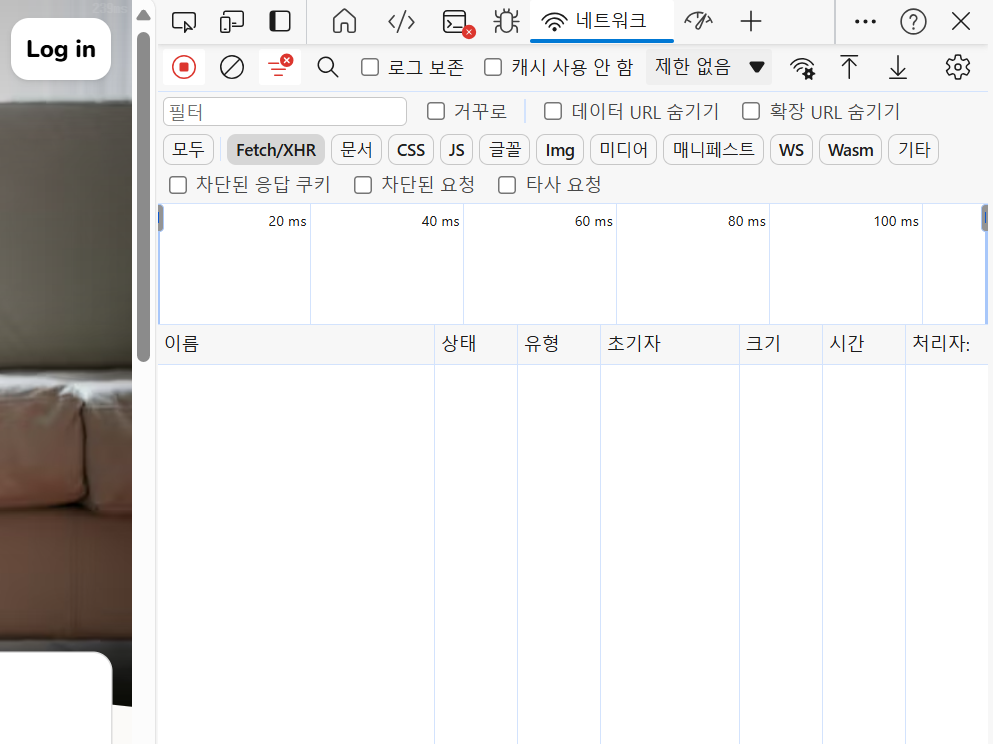

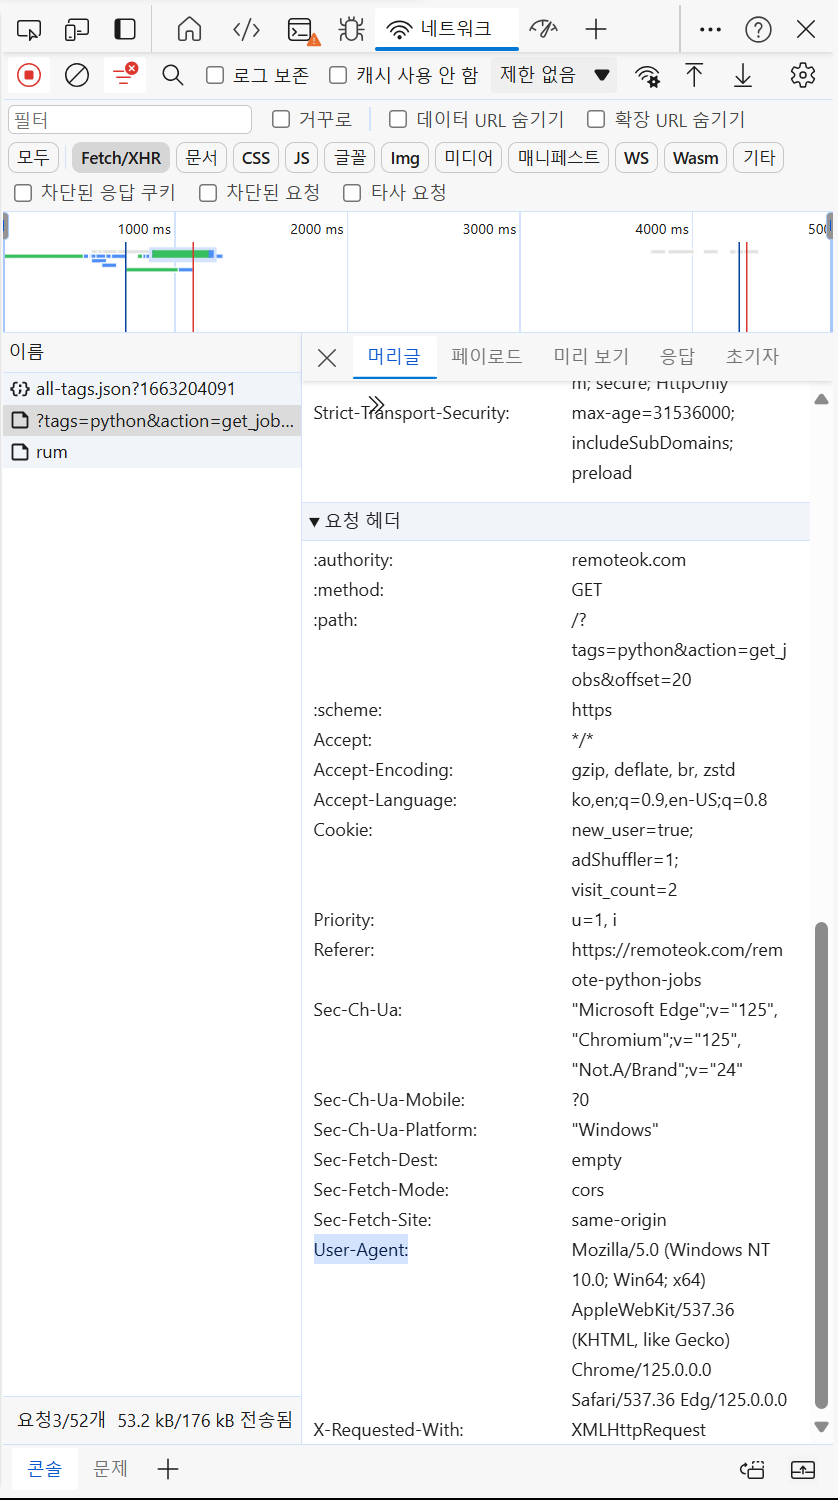

200번대 아무거나 선택 후 헤더 -> user_agent 확인

In [74]:
header = {
    'User-Agent' : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36 Edg/125.0.0.0"
}

In [75]:
response = requests. get(challenge_url, headers = header)
if response.status_code == 200:
    print("성공")
else :
    print("실패")

성공


In [76]:
soup = BeautifulSoup(response.content, 'html.parser')

In [77]:
response.content # 수집하고자 하는 insight의 

b'<!doctype html><html lang="en" class="  pageType-tag  remoteok    minimize-header   catch-emails-enabled"> <head>\n<script>\n\t\t\t\t\t\t// <auto detect user\'s OS dark mode if dark_mode not set before>\n\t\t\t\t\t\t\t//\n\t\t\t\t\t\t\t// this is vanilla JS and put here to block rendering so it\'s fast and \n\t\t\t\t\t\t\t// doesn\'t flash switching from light to dark mode if OS detected\n\t\t\t\t\t\t\t//\n\t\t\t\t\t\t\tfunction autoDetectOSDarkMode() {\n\t\t\t\t\t\t\t\tconsole.log(\'=====================\');\n\t\t\t\t\t\t\t\tconsole.log(\'autoDetectOSDarkMode\');\n\t\t\t\t\t\t\t\tvar cname=\'dark_mode\'\n\t\t\t\t\t\t\t\tvar name = cname + "=";\n\t\t\t\t\t\t\t\tvar ca = document.cookie.split(\';\');\n\t\t\t\t\t\t\t\tvar dark_mode=\'\';\n\t\t\t\t\t\t\t\tfor(var i=0; i<ca.length; i++) {\n\t\t\t\t\t\t\t\t\tvar c = ca[i];\n\t\t\t\t\t\t\t\t\twhile (c.charAt(0)==\' \') c = c.substring(1);\n\t\t\t\t\t\t\t\t\tif (c.indexOf(name) != -1) {\n\t\t\t\t\t\t\t\t\t\tdark_mode=c.substring(name.length

In [78]:
soup

<!DOCTYPE html>
<html><head><meta charset="utf-8"/><script>window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"f7ae79e7ca","applicationID":"192262830","transactionName":"d1gPFhEMXVVWQxwKC0dDCAwEEB5fRl1fORZdWgQ9DwpCTVpfVBU=","queueTime":1,"applicationTime":260,"agent":""}</script><script>(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"f7ae79e7ca",applicationID:"192262830"};;/*! For license information please see nr-loader-rum-1.260.0.min.js.LICENSE.txt */
(()=>{var e,t,r={234:(e,t,r)=>{"use strict";r.d(t,{P_:()=>v,Mt:()=>b,C5:()=>s,OP:()=>k,lF:()=>P,Yu:()=>_,Dg:()=>m,CX:()=>c,GE:()=>w,sU:()=>N});var n=r(8632),i=r(9567);const o={beacon:n.ce.beacon,errorBeacon:n.ce.errorBeacon,licenseKey:void 0,applicationID:void 0,sa:void 0,queueTime:void 0,applicationTime:void 0,ttGuid:void 0,user:void 0,account:void 0,product:void 0,extra:void 0,jsAttributes:{},userAttr

In [ ]:
item_table = soup.find('section', class_='jobs')